# Exercise 05
from Aschenbrenner Felix k11905022 & Hautzmayer Julian k11904007

In [ ]:
def f(x, y):
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

## 01
Draw the contour lines of the rosenbrock function in an interesting interval.

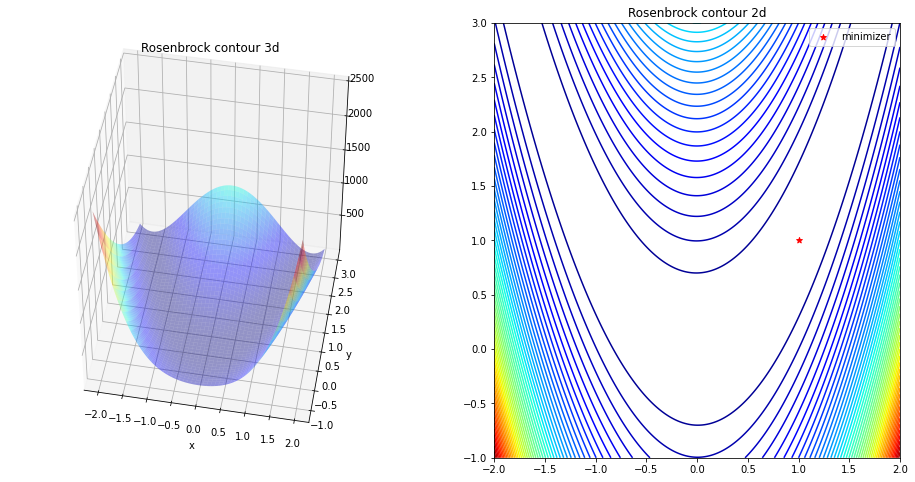

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.0, 2.0, 250)
y = np.linspace(-1, 3, 250)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(16, 8))

# surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='jet', alpha=.4, edgecolor='none')
ax.set_title('Rosenbrock contour 3d')

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, 50, cmap='jet')
ax.scatter([1], [1], color='r', marker='*', label='minimizer')
ax.set_title('Rosenbrock contour 2d')
ax.legend()

plt.show()


## 02

Analyze the steepest descent algorithm.

(i) What convergence do you expect (local, global, none)?

However our goal is to reach a global minimum gradient descent doesn't garantuee us to find one. It can easily happend that the gradient descent algorithm initialized with a bad step size can overstep a global minima or get stuck in a local minima before even reaching the global one. It is also very slow so sometimes a global minima cannot be reached in a reasonable time.

(ii) If you expect convergence, then how fast will it be (linear, superlinear, quadratic)? If linear, what is the corresponding constant?

We expect steepest decent to have linear convergence which is one of the reasons why it takes so long for some problems. We know if we have linear convergence then the constant has to be $c \in (0, 1)$. If we run $t$ iterations we expect the corresponding constant to be $\frac{1}{t}$.

## 03

Analyze the steepest Newton's method.

(i) What convergence do you expect (local, global, none)?

From theory wise newton method is designed to converge locally. One should start close to the root. But it does not guarantee to converge.

(ii) If you expect convergence, then how fast will it be (linear, superlinear, quadratic)? If linear, what is the corresponding constant?

Newton method converges very fast, so it's rate of convergence is clearly quadratic.

(iii) Can we say something about the step size $\alpha_k$?

The step length when using the algorithm from the previous exercise is between $(0, 1]$. To my suprise the step size jumps between 0.5 and 1 all the time. Most of the times it is 1. I checked this with multiple of my collegues and all are reporting such behaviour. It is completly different compared to steepest descent where it get's less and less.

In [89]:
import numpy as np

def rosenbrock(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2


def rosenbrock_grad(x):
    return np.array([
        -400 * x[0] * x[1] + 400 * x[0] ** 3 - 2 + 2 * x[0],
        200 * (x[1] - x[0] ** 2)
    ])


def rosenbrock_hess(x):
    return np.array([
        [-400 * x[1] + 1200 * x[0] ** 2 + 2, -400 * x[0]],
        [-400 * x[0], 200]
    ])

def newton(x_init, epsilon=1e-10, max_iterations=100):
    x = x_init
    step_sizes = []
    xs = []
    print(f"starting newton method from x0={x_init}")
    for i in range(max_iterations):
        gradient = rosenbrock_grad(x)
        transposed_gradient = np.transpose(gradient)
        hessian = rosenbrock_hess(x)
        inverse_hessian = np.linalg.inv(hessian)

        direction = -inverse_hessian @ gradient
        decrement = transposed_gradient @ inverse_hessian @ gradient

        if decrement / 2 <= epsilon:
            return x, i + 1, step_sizes, xs

        step_size = iterate_step_length(x, direction, gradient)
        x += step_size * direction
        step_sizes.append(step_size)
        xs.append([x[0], x[1]])
        #print(f'{i + 1}) x={x}, direction={direction}, stepsize={step_size}')

    return x, max_iterations, step_sizes, xs


def steepest_descent(x_init, epsilon=1e-3, max_iterations=10000):
    x = x_init
    step_sizes = []
    xs = []
    print(f"starting newton method from x0={x_init}")
    for i in range(max_iterations):
        gradient = rosenbrock_grad(x)
        direction = - gradient
        if np.linalg.norm(gradient) <= epsilon:
            return x, i + 1, step_sizes, xs
        step_size = iterate_step_length(x, direction, gradient)
        meta.append((step_size, direction, x))
        x += step_size * direction
        step_sizes.append(step_size)
        xs.append([x[0], x[1]])
        #print(f'{i + 1}) x={x}, direction={direction}, stepsize={step_size}')

    return x, max_iterations, step_sizes, xs

def iterate_step_length(x, direction, gradient, rho=0.49, beta=0.99):
    step_size = 1
    while rosenbrock(x + step_size * direction) > rosenbrock(x) + rho * step_size * np.inner(gradient, direction):
        step_size *= beta
    return step_size

def plot_step_size(step_sizes, xs, p, title):
  plt.figure(figsize=(8, 4))
  plt.plot(range(len(step_sizes)), step_sizes)
  plt.title(title)
  plt.xlabel('iterations')
  plt.ylabel('step-size')
  plt.show()

  x = np.linspace(-2.0, 2.0, 250)
  y = np.linspace(-1, 3, 250)
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  plt.figure(figsize=(16, 8))
  plt.contour(X, Y, Z, 50, cmap='jet')
  plt.scatter(p[0], p[1], color='g', marker='*', label='start')
  x1 = [x[0] for x in xs]
  x2 = [x[1] for x in xs]
  plt.scatter(x1, x2, color='b', alpha=0.5, label='steps')
  plt.plot([p[0], x1[0]], [p[1], x2[0]], color='b', alpha=0.25)
  plt.plot(x1, x2, color='b', alpha=0.25)
  plt.scatter([1], [1], color='r', marker='*', label='minimizer')
  plt.title('Rosenbrock contour 2d')
  plt.legend()

  plt.show()


starting newton method from x0=[1.2 1.2]
x* = [1.00000022 1.00000044]
Iterations = 8


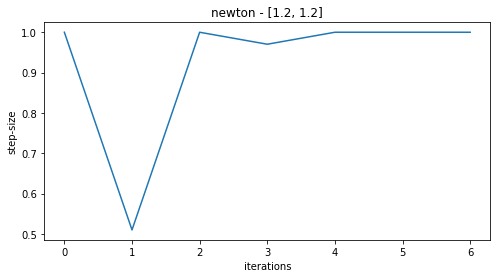

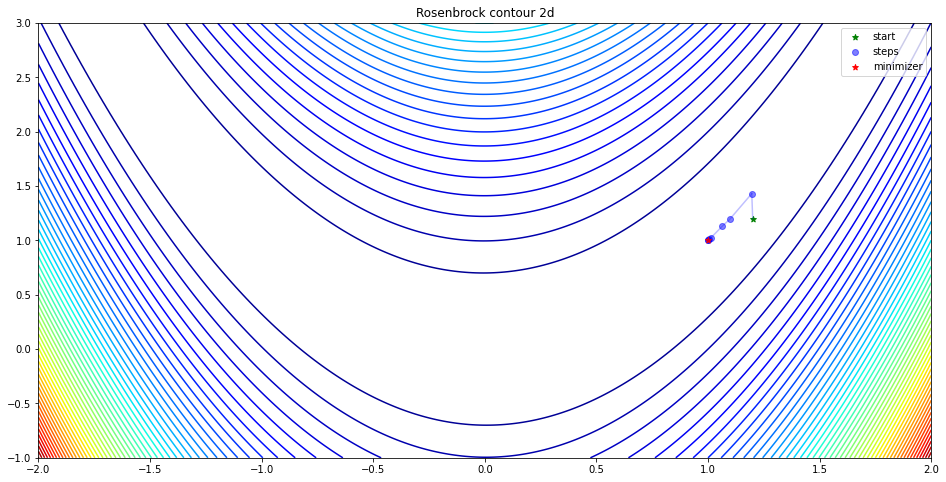

starting newton method from x0=[-1.2  1. ]
x* = [0.99999999 0.99999998]
Iterations = 22


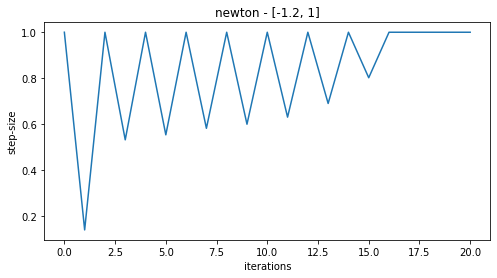

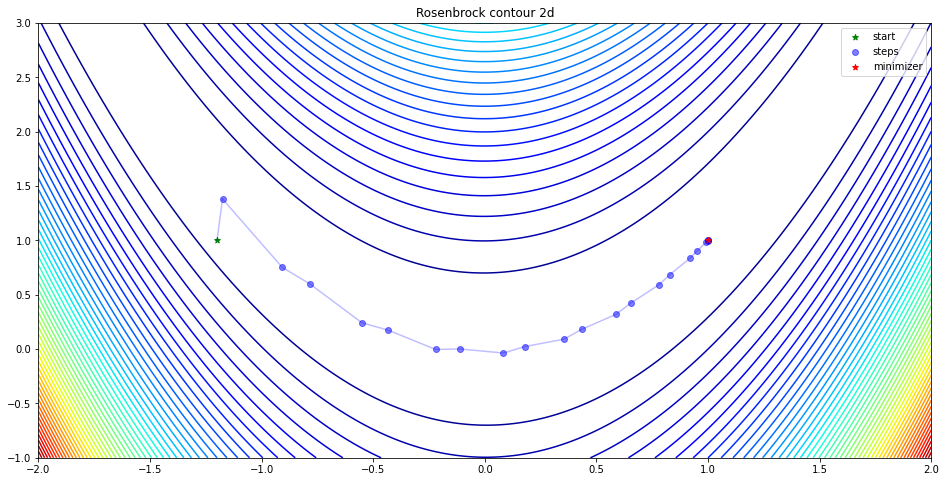

starting newton method from x0=[1.2 1.2]
x* = [1.00078805 1.00157828]
Iterations = 6680


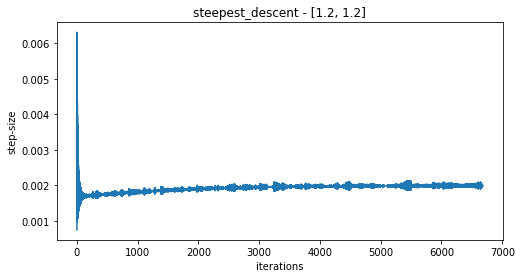

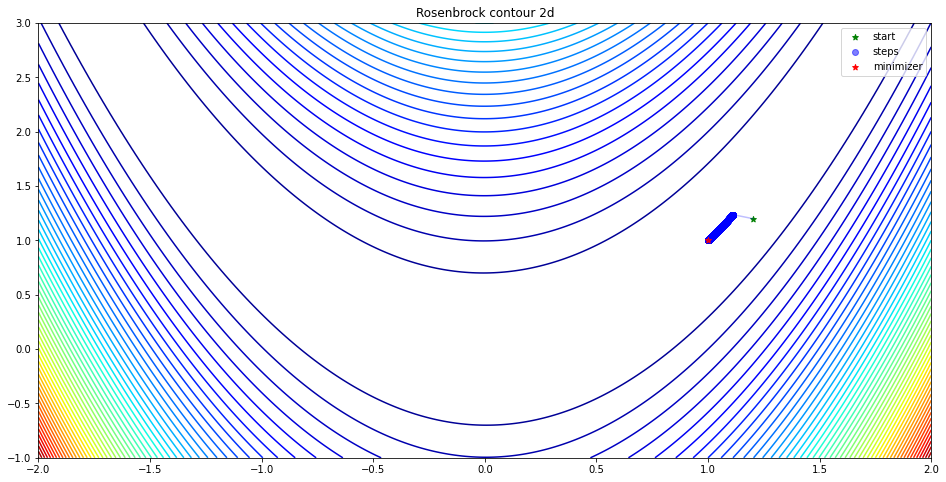

starting newton method from x0=[-1.2  1. ]
x* = [0.99919921 0.99839431]
Iterations = 4332


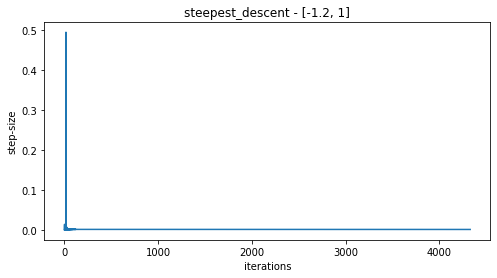

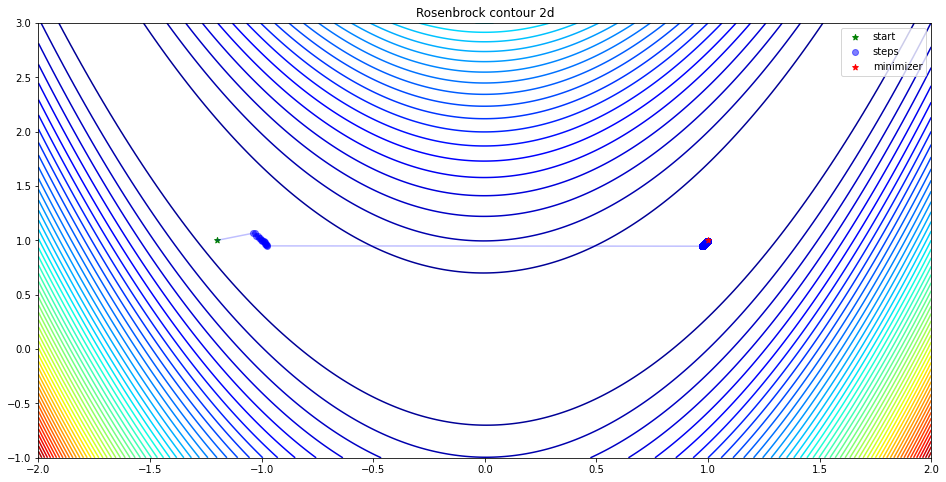

In [90]:
p = [1.2, 1.2]
x_min, it, step_sizes, xs = newton(np.array(p))
print('x* =', x_min)
print('Iterations =', it)
plot_step_size(step_sizes, xs, p, f'newton - {p}')

p = [-1.2, 1]
x_min, it, step_sizes, xs = newton(np.array(p))
print('x* =', x_min)
print('Iterations =', it)
plot_step_size(step_sizes, xs, p, f'newton - {p}')


p = [1.2, 1.2]
x_min, it, step_sizes, xs = steepest_descent(np.array(p))
print('x* =', x_min)
print('Iterations =', it)
plot_step_size(step_sizes, xs, p, f'steepest_descent - {p}')

p = [-1.2, 1]
x_min, it, step_sizes, xs = steepest_descent(np.array(p))
print('x* =', x_min)
print('Iterations =', it)
plot_step_size(step_sizes, xs, p, f'steepest_descent - {p}')